In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data33.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Проверяем формат столбцов

In [16]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сразу переведем столбец "Дата" в правильный формат

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


Сгруппируйте данные по дате, посчитайте количество продаж

In [21]:
grouped_df = df.groupby('Дата', as_index=False)['Количество'].sum()


Вывести несколько первых строк сгруппированных данных

In [22]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

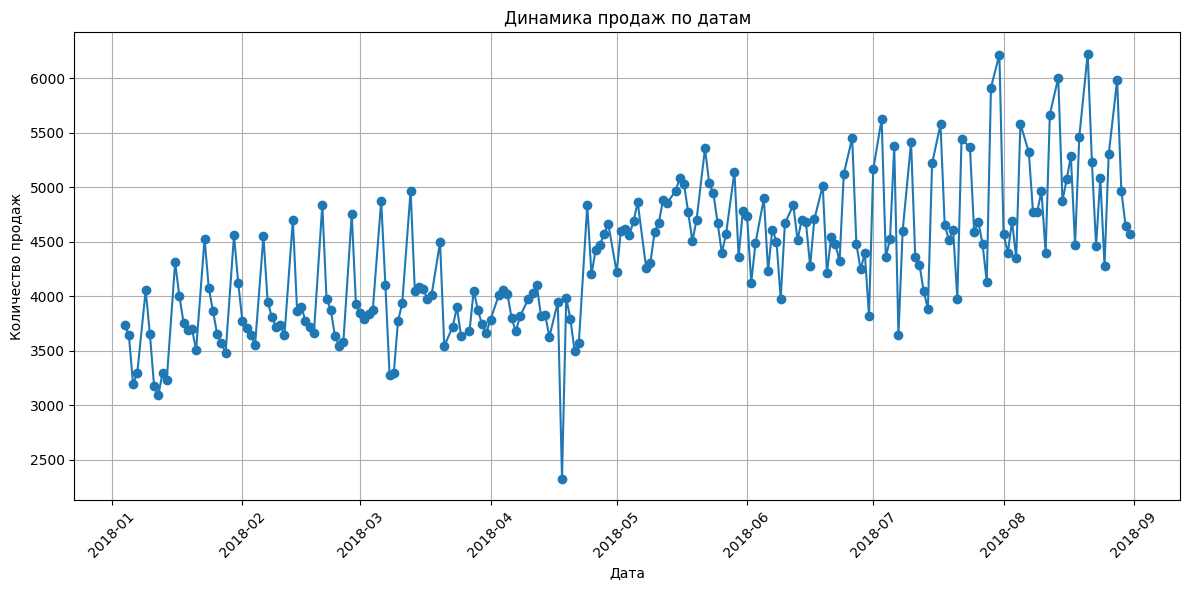

In [23]:
# Строим график
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o')
plt.title('Динамика продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

 - В апреле есть резкий провал (минимум всего периода).
 - Летом (июль–август) несколько пиков явно выделяются на фоне общего уровня.
 - С мая по июнь — рост среднего уровня продаж до 4 500–5 000.
 - В начале года (январь–март) продажи находятся на умеренном уровне (3 200–4 800), с выраженными регулярными колебаниями.
 - В июле–августе продажи становятся более высокими и нестабильными, доходя до 6 200

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [25]:
max_value = df['Количество'].max()
max_sales_rows = df[df['Количество'] == max_value]

max_sales_rows


,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [27]:
import pandas as pd

# Убедимся, что "Дата" в формате datetime
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True, errors='coerce')

# Фильтруем по июнь-июль-август и по средам
summer_wednesdays = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) &  # месяцы
    (df['Дата'].dt.weekday == 2)              # 0=понедельник, 2=среда
]

# Фильтруем по складу №3
summer_wednesdays_3 = summer_wednesdays[summer_wednesdays['Склад'] == 3]

# Группируем по товару (Номенклатура) и суммируем количество
top_product = (
    summer_wednesdays_3
    .groupby('Номенклатура', as_index=False)['Количество']
    .sum()
    .sort_values('Количество', ascending=False)
    .head(1)  # топ-1 товар
)

print(top_product)


  Номенклатура  Количество
1    product_1        2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [30]:
import csv

with open('weather.csv', 'r', encoding='utf-8') as f:
    dialect = csv.Sniffer().sniff(f.read(1024))
    print("Detected delimiter:", dialect.delimiter)


Detected delimiter: ;


In [35]:
import pandas as pd

# Пропускаем лишние строки, если они есть
df_weather = pd.read_excel('weather.xlsx', skiprows=0)

# Преобразуем дату в datetime
df_weather['Местное время в Астане'] = pd.to_datetime(df_weather['Местное время в Астане'], errors='coerce')

print(df_weather.head())



  Местное время в Астане     T     Po      P   Pa     U  \
0    2018-09-30 23:00:00   9.9  732.4  763.8 -0.7  57.0   
1    2018-09-30 20:00:00  11.9  733.1  764.2 -0.5  56.0   
2    2018-09-30 17:00:00  19.1  733.6  764.0 -1.4  24.0   
3    2018-09-30 14:00:00  19.7  735.0  765.4 -1.9  26.0   
4    2018-09-30 11:00:00  16.5  736.9  767.7 -0.7  43.0   

                                DD  Ff  ff10  ff3  ...  \
0              Ветер, дующий с юга   1   NaN  NaN  ...   
1              Ветер, дующий с юга   1   NaN  NaN  ...   
2              Ветер, дующий с юга   1   NaN  NaN  ...   
3              Ветер, дующий с юга   1   NaN  NaN  ...   
4  Ветер, дующий с юго-юго-востока   1   NaN  NaN  ...   

                                                  Cm  \
0  Высококучевых, высокослоистых или слоисто-дожд...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4               

C:\Users\AzizNazarov\AppData\Local\Temp\ipykernel_5580\3861612113.py:7: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_weather['Местное время в Астане'] = pd.to_datetime(df_weather['Местное время в Астане'], errors='coerce')


In [36]:
print(df_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Местное время в Астане  2182 non-null   datetime64[ns]
 1   T                       2182 non-null   float64       
 2   Po                      2182 non-null   float64       
 3   P                       2182 non-null   float64       
 4   Pa                      2179 non-null   float64       
 5   U                       2181 non-null   float64       
 6   DD                      2182 non-null   object        
 7   Ff                      2182 non-null   int64         
 8   ff10                    15 non-null     float64       
 9   ff3                     51 non-null     float64       
 10  N                       2180 non-null   object        
 11  WW                      2182 non-null   object        
 12  W1                      727 non-null    object  

In [37]:
df_weather = df_weather[['Местное время в Астане', 'T']]

print(df_weather.head())
print(df_weather.info())

  Местное время в Астане     T
0    2018-09-30 23:00:00   9.9
1    2018-09-30 20:00:00  11.9
2    2018-09-30 17:00:00  19.1
3    2018-09-30 14:00:00  19.7
4    2018-09-30 11:00:00  16.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Местное время в Астане  2182 non-null   datetime64[ns]
 1   T                       2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB
None


In [38]:
df_daily_avg = (
    df_weather
    .groupby(df_weather['Местное время в Астане'].dt.date)['T']
    .mean()
    .reset_index()
    .rename(columns={'Местное время в Астане': 'Дата', 'T': 'Средняя_температура'})
)

print(df_daily_avg.head())


         Дата  Средняя_температура
0  2018-01-01              -9.4625
1  2018-01-02              -9.5125
2  2018-01-03             -11.4625
3  2018-01-04             -14.0750
4  2018-01-05             -16.8625


In [42]:
# Приводим колонку к datetime
df_weather['Местное время в Астане'] = pd.to_datetime(
    df_weather['Местное время в Астане'], 
    errors='coerce'
)

# Теперь группировка по дате
df_daily_temp = (
    df_weather
    .groupby(df_weather['Местное время в Астане'].dt.date)['T']
    .mean()
    .reset_index()
    .rename(columns={'Местное время в Астане': 'Дата', 'T': 'Средняя_температура'})
)

# Приводим колонку Дата в datetime
df_daily_temp['Дата'] = pd.to_datetime(df_daily_temp['Дата'])

print(df_daily_temp.head())
print(df_daily_temp.info())


        Дата  Средняя_температура
0 2018-01-01              -9.4625
1 2018-01-02              -9.5125
2 2018-01-03             -11.4625
3 2018-01-04             -14.0750
4 2018-01-05             -16.8625
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Дата                 273 non-null    datetime64[ns]
 1   Средняя_температура  273 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB
None


        Дата  Средняя_температура
0 2018-01-01              -9.4625
1 2018-01-02              -9.5125
2 2018-01-03             -11.4625
3 2018-01-04             -14.0750
4 2018-01-05             -16.8625
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Дата                 273 non-null    datetime64[ns]
 1   Средняя_температура  273 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB
None


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Подготовка: убеждаемся, что есть нужные колонки и типы дат

# grouped_df: сумма продаж по датам (если уже есть — этот блок можно пропустить)
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True, errors='coerce')
grouped_df = (
    df.groupby('Дата', as_index=False)['Количество']
      .sum()
      .sort_values('Дата')
)

# df_daily_temp: средняя температура по дням (если уже есть — оставьте как есть)
# Ожидаем, что у вас есть df_weather с колонками 'Местное время в Астане' и 'T'
df_weather['Местное время в Астане'] = pd.to_datetime(df_weather['Местное время в Астане'], errors='coerce')

df_daily_temp = (
    df_weather
      .groupby(df_weather['Местное время в Астане'].dt.date)['T']
      .mean()
      .reset_index()
      .rename(columns={'Местное время в Астане': 'Дата'})
)

# Приводим 'Дата' к datetime для корректного merge и сортировки
df_daily_temp['Дата'] = pd.to_datetime(df_daily_temp['Дата'])

# 2) Объединение продаж и температуры по дате (только пересечение дат)
df_merged = pd.merge(grouped_df, df_daily_temp, on='Дата', how='inner').sort_values('Дата')

print(df_merged.head())
print(df_merged.info())


        Дата  Количество        T
0 2018-01-04        3734 -14.0750
1 2018-01-05        3643 -16.8625
2 2018-01-06        3193 -13.3000
3 2018-01-07        3298 -12.7500
4 2018-01-09        4055  -6.2500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Дата        205 non-null    datetime64[ns]
 1   Количество  205 non-null    int64         
 2   T           205 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.9 KB
None


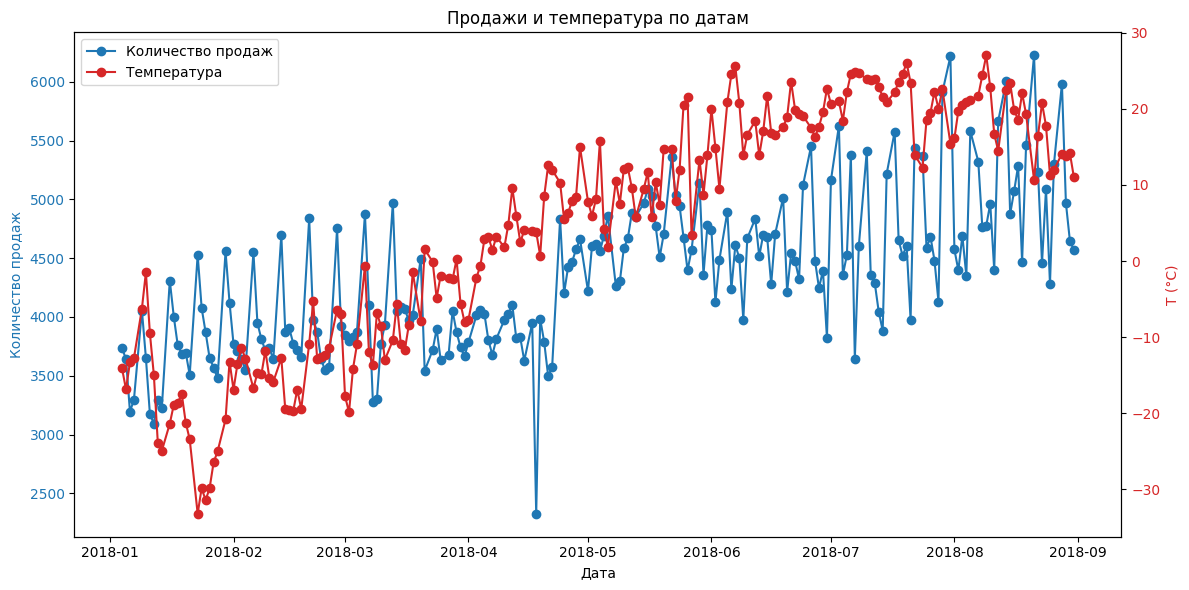

In [51]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Продажи (левая ось, синяя линия)
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='tab:blue')
l1, = ax1.plot(df_merged['Дата'], df_merged['Количество'], marker='o', color='tab:blue', label='Количество продаж')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Температура (правая ось, красная линия)
ax2 = ax1.twinx()
ax2.set_ylabel('T (°C)', color='tab:red')
l2, = ax2.plot(df_merged['Дата'], df_merged['T'], marker='o', color='tab:red', label='Температура')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Общая легенда
lines = [l1, l2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('Продажи и температура по датам')
plt.tight_layout()
plt.show()


In [52]:
# Корреляция Пирсона
corr_value = df_merged[['Количество', 'T']].corr().iloc[0, 1]
print(f'Корреляция между продажами и температурой: {corr_value:.3f}')


Корреляция между продажами и температурой: 0.600


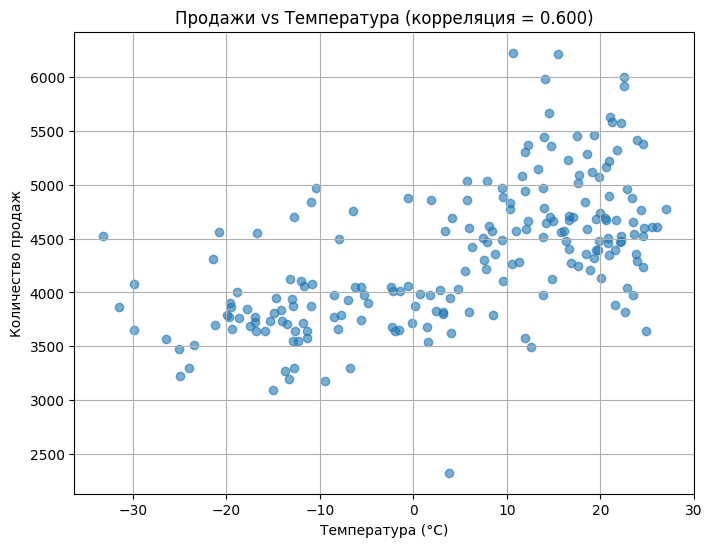

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_merged['T'], df_merged['Количество'], alpha=0.6)
plt.title(f'Продажи vs Температура (корреляция = {corr_value:.3f})')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()


Корреляция между продажами и температурой: 0.600


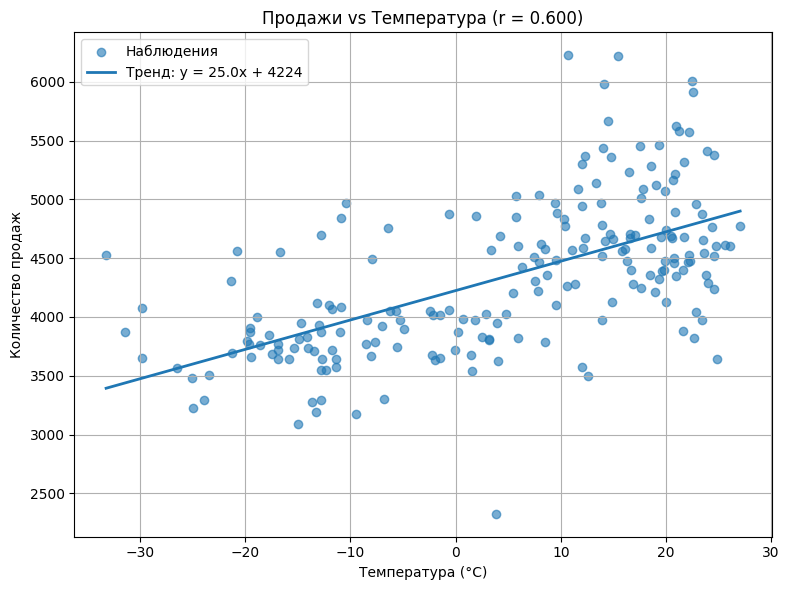

In [54]:
# 1) Корреляция Пирсона (по пересечению непустых значений)
tmp = df_merged[['Количество', 'T']].dropna()
corr_value = tmp.corr().iloc[0, 1]
print(f'Корреляция между продажами и температурой: {corr_value:.3f}')

# 2) Диаграмма рассеяния + линия тренда
x = tmp['T'].values
y = tmp['Количество'].values

# Линейная регрессия y = a*x + b
a, b = np.polyfit(x, y, 1)
y_hat = a * x + b

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, label='Наблюдения')
plt.plot(np.sort(x), a*np.sort(x) + b, linewidth=2, label=f'Тренд: y = {a:.1f}x + {b:.0f}')
plt.title(f'Продажи vs Температура (r = {corr_value:.3f})')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество продаж')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()